- 실습 데이터 : https://www.kaggle.com/datasets/zygmunt/goodbooks-10k
- 코드 출처 : https://github.com/zygmuntz/goodbooks-10k/blob/master/quick_look.ipynb

In [1]:
# 구글 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%matplotlib inline

import pandas as pd

ratings = pd.read_csv('/content/drive/MyDrive/Work/24 DCC/data/ratings.csv')
to_read = pd.read_csv('/content/drive/MyDrive/Work/24 DCC/data/to_read.csv')
books = pd.read_csv('/content/drive/MyDrive/Work/24 DCC/data/books.csv')

tags = pd.read_csv('/content/drive/MyDrive/Work/24 DCC/data/tags.csv')
book_tags = pd.read_csv('/content/drive/MyDrive/Work/24 DCC/data/book_tags.csv')

### Ratings

In [4]:
ratings.head(10)

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
5,2,26,4
6,2,315,3
7,2,33,4
8,2,301,5
9,2,2686,5


Ratings are sorted chronologically, oldest first.

In [5]:
len(ratings) #length

5976479

<Axes: >

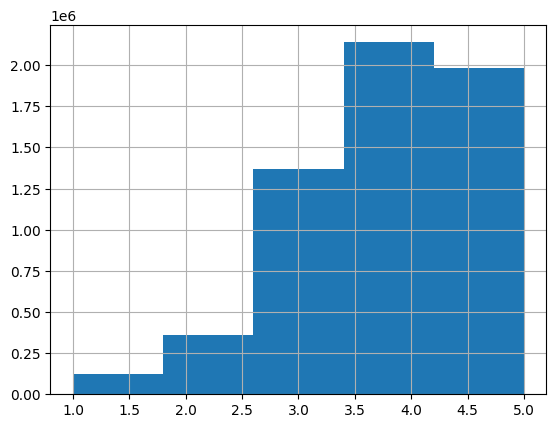

In [6]:
ratings.rating.hist(bins = 5)

### To read
These are the books users marked "to read".


In [7]:
to_read.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [8]:
len(to_read)

912705

Most books have been marked to read by somebody. Majority of the users have some books marked to read.

In [9]:
len(to_read.book_id.unique())

9986

In [10]:
len(to_read.user_id.unique())

48871

### Books

In [11]:
books.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [12]:
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [13]:
pd.set_option('display.max_columns', None)
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


Books are sorted by their popularity, as measured by number of ratings (overall, not in this dataset).

In [14]:
len(books)

10000

### Reviews per book

Most books have a few hundred reviews, but some have as few as eight.

In [15]:
reviews_per_book = ratings.groupby('book_id').book_id.apply(lambda x: len(x))
reviews_per_book

,book_id
book_id,
1,22806
2,21850
3,16931
4,19088
5,16604
...,...
9996,141
9997,93
9998,102


In [16]:
reviews_per_book.describe()

,book_id
count,10000.000000
mean,597.647900
std,1267.289788
min,8.000000
25%,155.000000
50%,248.000000
75%,503.000000
max,22806.000000


In [17]:
reviews_per_book.sort_values(ascending=False).head(10)

,book_id
book_id,
1,22806
2,21850
4,19088
3,16931
5,16604
17,16549
20,15953
18,15855
23,15657


### Reviews per user

All users have at least 19 reviews.

In [18]:
reviews_per_user = ratings.groupby('user_id').user_id.apply(lambda x: len(x))
reviews_per_user

,user_id
user_id,
1,117
2,65
3,91
4,134
5,100
...,...
53420,110
53421,110
53422,130


In [19]:
reviews_per_user.describe()

,user_id
count,53424.000000
mean,111.868804
std,26.071224
min,19.000000
25%,96.000000
50%,111.000000
75%,128.000000
max,200.000000


In [20]:
reviews_per_user.sort_values(ascending=False).head(10)

,user_id
user_id,
30944,200
12874,200
52036,199
12381,199
28158,199
45554,197
6630,197
15604,196
37834,196


### Tags

In [21]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [22]:
len(tags)

34252

In [23]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


Tag applications are sorted by goodreads_book_id ASC and by count DESC.

In [24]:
len(book_tags)

999912

Let us merge tag names into tag applications.

In [25]:
book_tags = book_tags.merge(tags, on = 'tag_id')

In [26]:
book_tags.columns

Index(['goodreads_book_id', 'tag_id', 'count', 'tag_name'], dtype='object')

Why don't we merge book titles for good measure.

In [28]:
book_tags = book_tags.merge(books[['goodreads_book_id', 'title']], on = 'goodreads_book_id')

In [29]:
book_tags.columns

Index(['goodreads_book_id', 'tag_id', 'count', 'tag_name', 'title_x',
       'title_y'],
      dtype='object')

It appears that there are some negative tag counts. Let's fix this.

In [30]:
book_tags['count'].describe()

,count
count,999912.000000
mean,208.869633
std,3501.265173
min,-1.000000
25%,7.000000
50%,15.000000
75%,40.000000
max,596234.000000


In [32]:
book_tags.loc[book_tags['count']< 0, 'count'] = 0

In [33]:
book_tags.describe()

,goodreads_book_id,tag_id,count
count,9.999120e+05,999912.000000,999912.000000
mean,5.263442e+06,16324.527073,208.869639
std,7.574057e+06,9647.846196,3501.265173
min,1.000000e+00,0.000000,0.000000
25%,4.622700e+04,8067.000000,7.000000
50%,3.948410e+05,15808.000000,15.000000
75%,9.378297e+06,24997.000000,40.000000
max,3.328864e+07,34251.000000,596234.000000


Sample some popular book tags.

In [34]:
book_tags.sample(10)

,goodreads_book_id,tag_id,count,tag_name,title_x,title_y
831823,13513205,33165,8,youth,A Wrinkle in Time: The Graphic Novel,A Wrinkle in Time: The Graphic Novel
314798,79879,25314,3,read-to-son,From Head to Toe,From Head to Toe
695124,7015403,3358,77,audible,The Gifts of Imperfection: Let Go of Who You T...,The Gifts of Imperfection: Let Go of Who You T...
892548,17443673,25436,12,realistic,A Different Blue,A Different Blue
367606,113435,22743,388,owned,"Crossroads of Twilight (Wheel of Time, #10)","Crossroads of Twilight (Wheel of Time, #10)"
734483,8458018,27313,10,series-to-finish,The Warlock (The Secrets of the Immortal Nicho...,The Warlock (The Secrets of the Immortal Nicho...
196271,31304,20205,11,mistery,"Nemesis (Miss Marple, #12)","Nemesis (Miss Marple, #12)"
746665,9166877,671,7,2011-reads,The Girl in the Steel Corset (Steampunk Chroni...,The Girl in the Steel Corset (Steampunk Chroni...
6611,656,20774,99,my-books,War and Peace,War and Peace
17714,2187,11505,108,favorite-books,Middlesex,Middlesex


In [35]:
book_tags.sample(10, weights = 'count') # popular -> weights='count'를 사용하면 count 열의 값이 큰 행일수록 더 자주 선택될 가능성이 높아집니다. 이 말은 샘플이 고르게 분포되기보다는 count 값이 큰 데이터에 더 집중되어 선택된다는 의미입니다.

,goodreads_book_id,tag_id,count,tag_name,title_x,title_y
876594,16181775,30574,31065,to-read,"The Rosie Project (Don Tillman, #1)","The Rosie Project (Don Tillman, #1)"
525594,544257,30574,17473,to-read,"Midnight Alley (The Morganville Vampires, #3)","Midnight Alley (The Morganville Vampires, #3)"
164003,23753,8717,271,currently-reading,"The Absolute Sandman, Volume One","The Absolute Sandman, Volume One"
702151,7171637,25149,288,read-in-2013,"Clockwork Angel (The Infernal Devices, #1)","Clockwork Angel (The Infernal Devices, #1)"
817994,13099738,30574,133977,to-read,Steal Like an Artist: 10 Things Nobody Told Yo...,Steal Like an Artist: 10 Things Nobody Told Yo...
834153,13536860,22944,67,paperback,"Fifty Shades Freed (Fifty Shades, #3)","Fifty Shades Freed (Fifty Shades, #3)"
782194,11084145,30574,60387,to-read,Steve Jobs,Steve Jobs
583494,1176884,30574,14766,to-read,"Body Movers (Body Movers, #1)","Body Movers (Body Movers, #1)"
704197,7235533,8717,8827,currently-reading,"The Way of Kings (The Stormlight Archive, #1)","The Way of Kings (The Stormlight Archive, #1)"
928533,18966819,18054,23,library-books,"Golden Son (Red Rising, #2)","Golden Son (Red Rising, #2)"


These are the most popular tags:

In [36]:
tag_counts = book_tags.groupby('tag_name').tag_name.count().sort_values(ascending = False)
tag_counts.head(20)

,tag_name
tag_name,
to-read,9983
favorites,9881
owned,9858
books-i-own,9799
currently-reading,9776
library,9415
owned-books,9221
fiction,9097
to-buy,8692


# Visualization

<ipython-input-37-295f47a8cd9b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="average_rating", y="original_title", data=tf_top_rated, palette="viridis")


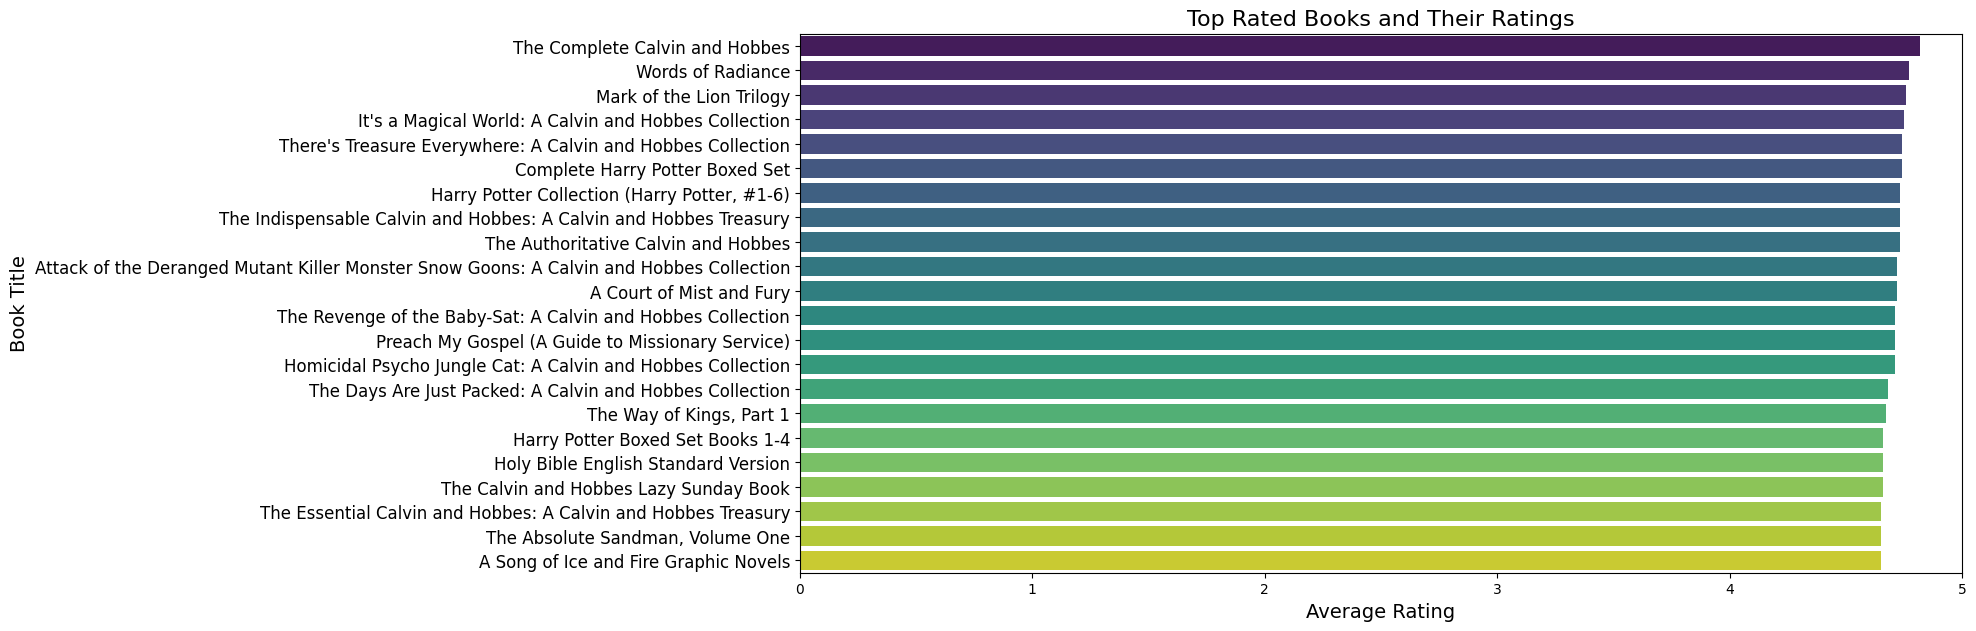

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

top_rated = books.sort_values('average_rating', ascending=False)
tf_top_rated = top_rated[:25] #indexing

# Figure 크기 설정
plt.figure(figsize=(15, 7))

# Seaborn으로 수평 막대 그래프 그리기
sns.barplot(x="average_rating", y="original_title", data=tf_top_rated, palette="viridis")

# 그래프 제목 설정
plt.title('Top Rated Books and Their Ratings', fontsize=16)

# x축, y축 라벨 설정
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Book Title', fontsize=14)

# x축 값 범위 설정 (선택사항)
plt.xlim(0, 5)  # 예시로 평균 평점 범위를 0에서 5까지 설정

# y축 라벨 회전 (필요한 경우)
plt.yticks(rotation=0, fontsize=12)

# 그래프 표시
plt.show()

<ipython-input-38-623c5d110635>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ratings_count", y="original_title", data=twenty_top_popular, palette="viridis")


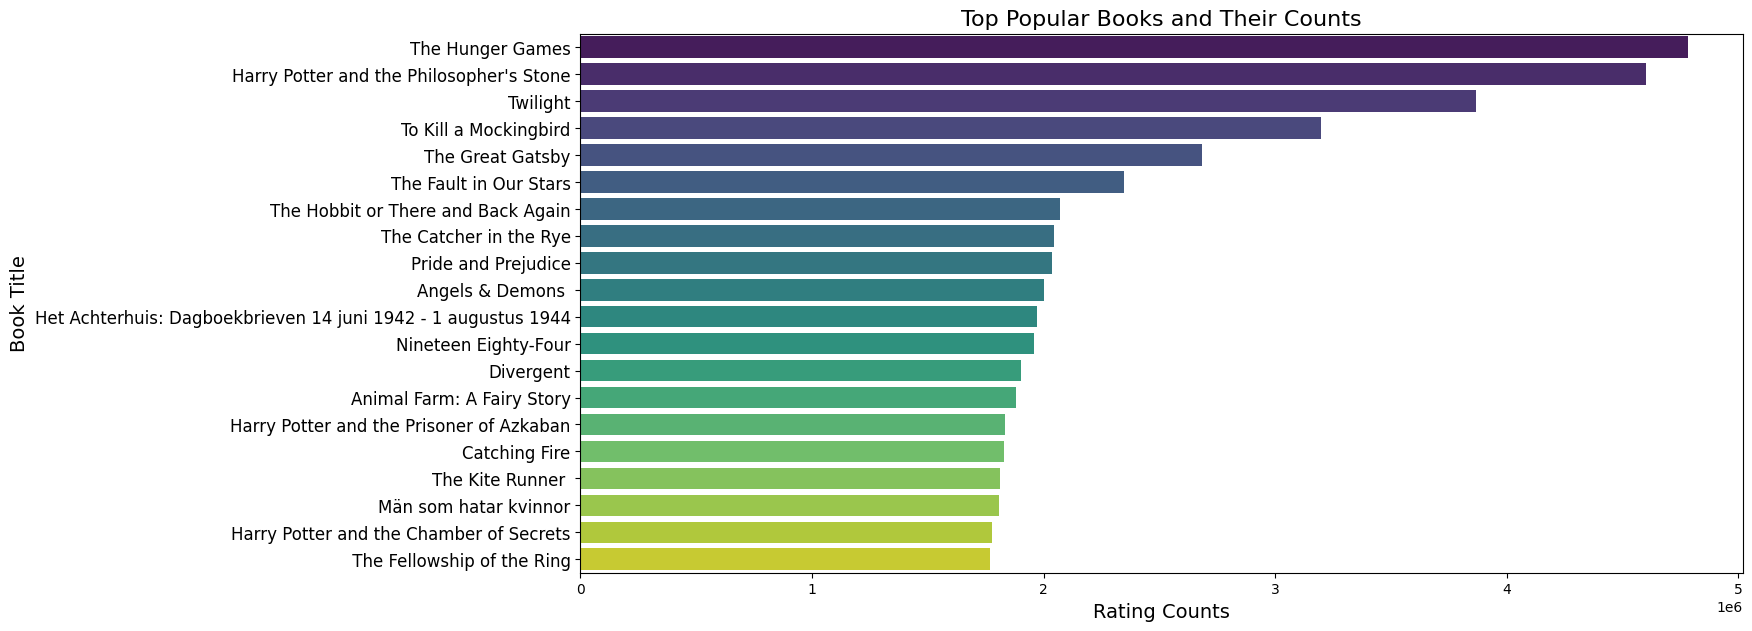

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

top_popular = books.sort_values('ratings_count', ascending=False)
twenty_top_popular = top_popular[:20]

# Figure 크기 설정
plt.figure(figsize=(15, 7))

# Seaborn으로 수평 막대 그래프 그리기
sns.barplot(x="ratings_count", y="original_title", data=twenty_top_popular, palette="viridis")

# 그래프 제목 설정
plt.title('Top Popular Books and Their Counts', fontsize=16)

# x축, y축 라벨 설정
plt.xlabel('Rating Counts', fontsize=14)
plt.ylabel('Book Title', fontsize=14)

# y축 라벨 회전 (필요한 경우)
plt.yticks(rotation=0, fontsize=12)

# 그래프 표시
plt.show()

In [39]:
from wordcloud import WordCloud, STOPWORDS

In [40]:
author_string = " ".join(books['authors'])
title_string = " ".join([str(book_name) for book_name in books['original_title']])

In [41]:
def wordcloud(string):
    stopwords = set(STOPWORDS)
    wc = WordCloud(width=800, height=500, mask=None, random_state=21,
                   max_font_size=110,stopwords=stopwords).generate(string)
    fig=plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(wc)

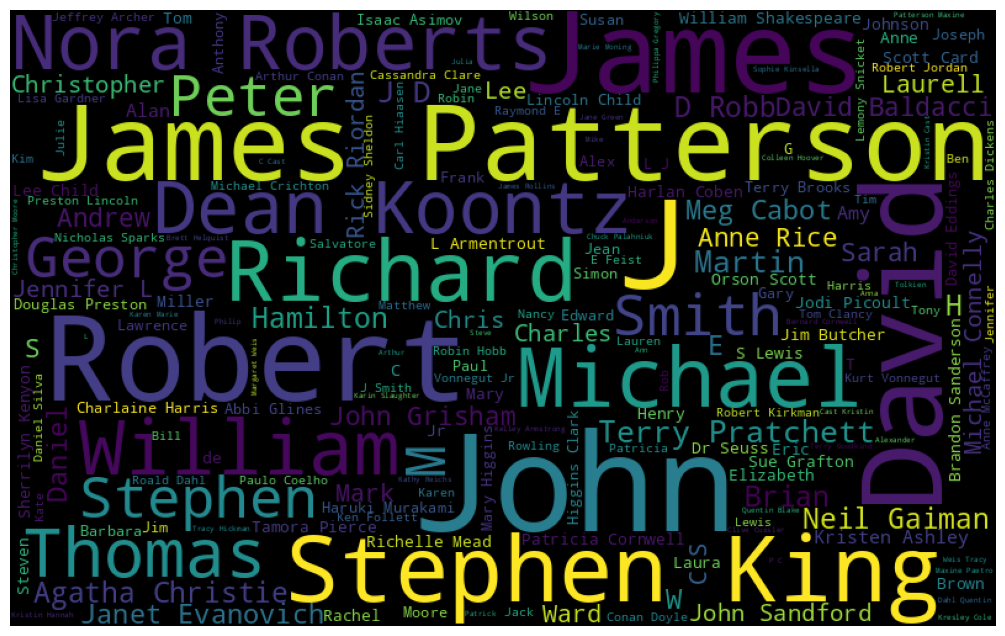

In [42]:
wordcloud(author_string)

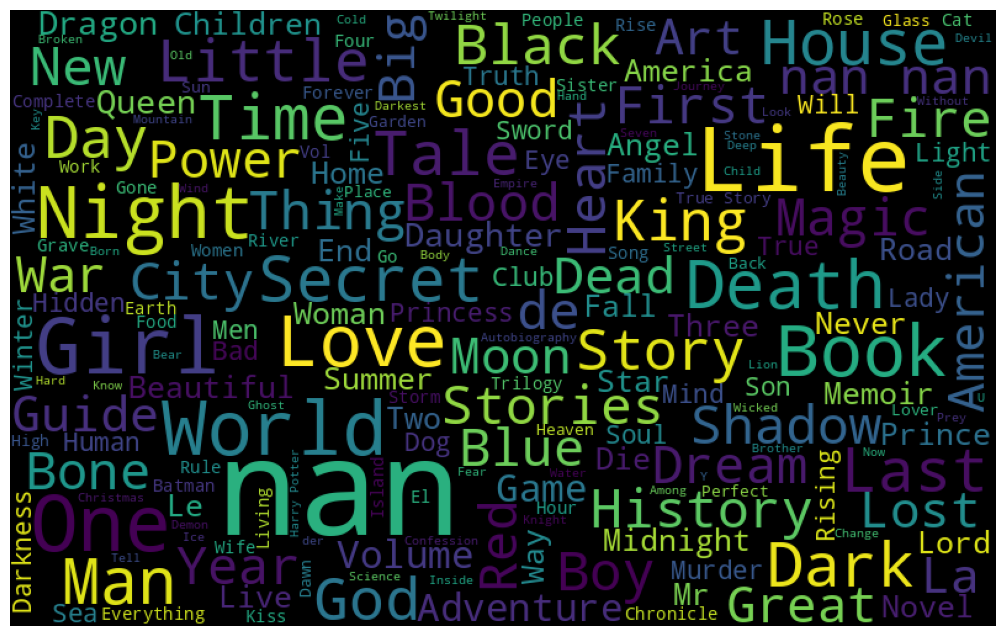

In [43]:
wordcloud(title_string)